## Instalando biblioteca do Twitter

In [ ]:
!pip install tweepy

### Documentação da biblioteca Tweepy
https://docs.tweepy.org/en/latest/getting_started.html

In [1]:
import tweepy as tw
import pandas as pd

## Chaves de acesso fornecidas pelo twitter
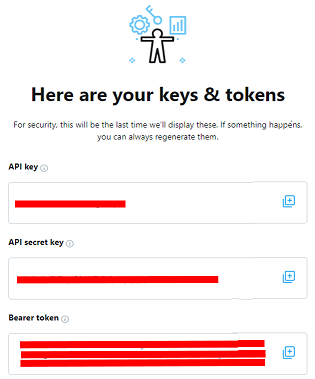

# Abrir documento que contém as informções de acesso

Vamos copiar as chaves de acesso fornecidas pelo twiter e salvar em um arquivo do tipo txt. 
Esse arquivo vamos salvar no diretório do projeto da coleta do Twitter. 

A ideia é ter as chaves salvas em um aquivo e depois criar um código em python para acessa-las lendo linha por linha e adicionando as variáveis para cada tipo de chave de acesso. Dessa forma, para cada linha do arquivo txt será a identificação de uma chave de acesso liberada pelo Twitter.

In [3]:
with open ("twitter_token.txt", "r") as file:
    consumer_key = file.readline().strip('\n') # elimina o caracter \n que é uma quebra de linha
    consumer_secret = file.readline().strip('\n')
    token = file.readline().strip('\n')
    access_token = file.readline().strip('\n')
    access_token_secret = file.readline().strip('\n')

## Realizando autentificação na API do Twitter

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth) # Cria a conexão de acesso com o twitter

public_tweets = api.home_timeline() # Pega todos os primeiros twittes da timeline


## Visualizando os tweets  públicos da time line

In [5]:
for tweet in public_tweets: # mostra os principais tweets da time line
    print(tweet.text)

Enquanto os evangélicos estão em colaboração máxima, a Igreja de São Sebastião faz isso… https://t.co/gWb28aTESM
Após reunião com o consulado da Rússia, ficou definido que será assinado na segunda-feira o primeiro dos acordos co… https://t.co/rUmkhR7KTp
Estamos com dinheiro em caixa e já anunciamos a intenção de comprar 4 milhões de vacinas para Belo Horizonte. Já fi… https://t.co/wSRMUQ3OFc
RT @clebioojunior: Saiu hoje o meu primeiro artigo aceito para publicação no @datahackersofic! 

#machinelearning #ciênciadedados #DataScie…
Ronaldinho, meu filho, eu sei o que é perder uma mãe. Meus sentimentos nesse momento tão difícil.
Muito obrigado a todos da linha de frente da Saúde, da Polícia Militar de Minas Gerais, Guarda Municipal e Secretar… https://t.co/Ze4uNBQsMF
Que isso, Prefeito, a luta pela vida é de todos. Fique à vontade. https://t.co/0ujZgHMwMp
RT @dione_xavier: Já falei que o Slack do @datahackersofic é melhor que a maioria das pós/MBA em data do mercado???
Segunda-feira, as b

##  Extraindo tweets baseado em tema

Para buscar os tweets vamos utilizar a função cursor da biblioteca tweepy.
Para saber como utilizar o cursor podemos abrir a documentação da biblioteca. https://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html

In [6]:
busca_palavras = "#vacina" #Cria uma variável que é atribuida as palavras que queremos extrair

In [7]:
# busca todos os tweets relacionado a(s) palavra(s) procuradas
tweets = tw.Cursor(api.search, # metodo da API para busrcar tweets
            q=busca_palavras).items(50) # especifica o número de tweets retornados

### Verificando atributos disponibilização em um tweet

In [8]:
for tweet in tweets:
    print(tweet.user.name, tweet.text) # traz o texto contidos nos tweets

sereiadolagonorte @dannlelis Quanto mais gente vacinada maiores chances de sair do caos. Sobretudo esse grupo prioritário que é mais… https://t.co/WH3ibmv3XC
Vitor Santos RT @WSarai: Motivo de orgulho para brasileiras e brasileiros, o Instituto #Butantan anuncia avanço no desenvolvimento de uma #vacina nacion…
Rosemary Ferro RT @bpaludeti: Butanvac vai utilizar a mesma tecnologia da vacina da gripe, vai mandar os papéis hoje pra Anvisa aprovar e começar o quanto…
Monika 💉🐊 @butantanoficial anuncia a #Butanvac, nova candidata a #vacina contra #Covid.

O @butantanoficial tem sido, nesta p… https://t.co/nrMJyhaL6G
Guarulhos Online Butantan anuncia a Butanvac, nova candidata a vacina contra Covid-19 no Brasil. #butanvac #coronavírus #covid19… https://t.co/aTm1RuqRR6
🔰SuperⓂ️oro🔰 RT @WSarai: Motivo de orgulho para brasileiras e brasileiros, o Instituto #Butantan anuncia avanço no desenvolvimento de uma #vacina nacion…
Gustavo de Sousa RT @Medicina_CFM: As vacinas contra a #covid-19 foram ap

## Verificando atributos chaves contidas dentro de um  tweet

In [9]:
tweet._json

{'created_at': 'Fri Mar 26 11:21:11 +0000 2021',
 'id': 1375407480264613895,
 'id_str': '1375407480264613895',
 'text': 'RT @istoe_dinheiro: Butanvac: vacina 100% nacional é anunciada em SP\n#Butanvac #Butantan #Vacina #madeinbrasil\n\nhttps://t.co/30k0GJP6Wm',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'Butanvac', 'indices': [69, 78]},
   {'text': 'Butantan', 'indices': [79, 88]},
   {'text': 'Vacina', 'indices': [89, 96]},
   {'text': 'madeinbrasil', 'indices': [97, 110]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'istoe_dinheiro',
    'name': 'ISTOÉ Dinheiro',
    'id': 42962996,
    'id_str': '42962996',
    'indices': [3, 18]}],
  'urls': [{'url': 'https://t.co/30k0GJP6Wm',
    'expanded_url': 'https://www.istoedinheiro.com.br/butanvac-governo-de-sp-cria-vacina-desenvolvida-pelo-instituto-butantan/',
    'display_url': 'istoedinheiro.com.br/butanvac-gover…',
    'indices': [112, 135]}]},
 'metadata': {'iso_language_code': 'pt', 'result_type': 'recent'},
 

## Visualizando tweets coletados

Cada tweet possui uma série de atributos
Por exemplo:
    
    1.  created_at: Data da publicação
    2.  name: Contém o nome da pessoa 
    3.  description: Contém a descrição do usuário
    4.  location: Local onde foi postado o tweet
    5.  text - Texto que a pessoa postou
    

In [10]:
# Para facilitar a visualização
vars(tweet).keys() #retornar todas as chaves dentro de tweets

dict_keys(['_api', '_json', 'created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'source_url', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'author', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [11]:
vars(tweet.user).keys() #retorna todas as chaves dentro do atributo user

dict_keys(['_api', '_json', 'id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [12]:
print(tweet.user.name,'-',tweet.user.location)

🇵🇾🇧🇷 ℝ𝕖𝕟𝕖́ 𝔽. 𝕊𝕖𝕣𝕧𝕚́𝕟 𝔹. 💙 - Amambay, Paraguay


## Retirando tweets repetidos

Para retirar os tweets repetidos, vamos adicionar na string de busca o comando **"-filter:retweets"** para informar que não queremos informações de retweets

In [13]:
busca_palavras = "#vacina" + "-filter:retweets" #Cria uma variável} que é atribuida as palavras que queremos extrair

In [14]:
# busca todos os tweets relacionado a(s) palavra(s) procuradas
tweets = tw.Cursor(api.search, # metodo da API para busrcar tweets
            q=busca_palavras).items(50) # especifica o número de tweets retornados

In [15]:
for tweet in tweets:
    print( tweet.created_at, '\n',  tweet.user.name, '\n', tweet.text, '\n') # traz o texto contidos nos tweets

2021-03-26 11:56:14 
 sereiadolagonorte 
 @dannlelis Quanto mais gente vacinada maiores chances de sair do caos. Sobretudo esse grupo prioritário que é mais… https://t.co/WH3ibmv3XC 

2021-03-26 11:54:55 
 Monika 💉🐊 
 @butantanoficial anuncia a #Butanvac, nova candidata a #vacina contra #Covid.

O @butantanoficial tem sido, nesta p… https://t.co/nrMJyhaL6G 

2021-03-26 11:54:05 
 Guarulhos Online 
 Butantan anuncia a Butanvac, nova candidata a vacina contra Covid-19 no Brasil. #butanvac #coronavírus #covid19… https://t.co/aTm1RuqRR6 

2021-03-26 11:49:54 
  Luís André Tidé™ 
 #Covid #Vacina  https://t.co/yaDxs20fqu 

2021-03-26 11:48:23 
 Ana Karla de Souza 
 Correio das boas notícias, chegou! 
Bom dia pessoal! 

#c19 #vacina #cura #brasil🇧🇷 #natal em Brasil (País) https://t.co/uCyrVa1FvY 

2021-03-26 11:47:47 
 Wellington C Saraiva 
 Motivo de orgulho para brasileiras e brasileiros, o Instituto #Butantan anuncia avanço no desenvolvimento de uma… https://t.co/qG73AGxuEa 

2021-03-26 1

### Observação Importante

O cursor é um método dinâmico. Dessa forma, todas as vezes que o método é executado novos resultados são retornados.
Isso acontece porque os tweets são postados a todo minuto. Ou seja, a busca é em tempo real. 

O proximo passo é criar uma estrututa de armazenamento para salvar os tweets que estamos coletando.


## Criando lista de armazenamento
Vamos criar uma lista vazia e adicionando os dados coletados de os tweets.

In [19]:
busca_palavras = "#vacina" + "-filter:retweets" #Cria uma variável} que é atribuida as palavras que queremos extrair

# busca todos os tweets relacionado a(s) palavra(s) procuradas
tweets = tw.Cursor(api.search, # metodo da API para busrcar tweets
            q=busca_palavras).items(1500) # especifica o número de tweets retornados

In [20]:
# Para cada tweet em tweets, vamos coletar as informações dos atributos que queremos armazenar.
lista_tweets = []
for tweet in tweets:
    dados_tweet = []
    dados_tweet.append(tweet.created_at) 
    dados_tweet.append(tweet.user.name) 
    dados_tweet.append(tweet.user.description) 
    dados_tweet.append(tweet.user.location)
    dados_tweet.append(tweet.text)
    
    lista_tweets.append(dados_tweet)

In [21]:
lista_tweets[:5]

[[datetime.datetime(2021, 3, 26, 11, 56, 14),
  'sereiadolagonorte',
  'Sou uma sereia e vivo no Lago',
  '',
  '@dannlelis Quanto mais gente vacinada maiores chances de sair do caos. Sobretudo esse grupo prioritário que é mais… https://t.co/WH3ibmv3XC'],
 [datetime.datetime(2021, 3, 26, 11, 54, 55),
  'Monika 💉🐊',
  '#AntiPopulistas de direita ou esquerda 🚫\nNão tenho #PolíticosDeEstimação e #NaoPassoPano.\nO Brasil só mudará c/ cultura e educação de qualidade p/ tds',
  'Brasil',
  '@butantanoficial anuncia a #Butanvac, nova candidata a #vacina contra #Covid.\n\nO @butantanoficial tem sido, nesta p… https://t.co/nrMJyhaL6G'],
 [datetime.datetime(2021, 3, 26, 11, 54, 5),
  'Guarulhos Online',
  "Você Conectado!\n📝Jornalismo Local e Plural\n📧Use a tag #guarulhosonline\n📲Siga o GO no Facebook e Instagram\n🎧Podcast 'A PAUTA' no Spotify - https://t.co/G1G3SaIYR3",
  'Guarulhos, Brasil',
  'Butantan anuncia a Butanvac, nova candidata a vacina contra Covid-19 no Brasil. #butanvac #coronavír

## Criando um dataframe para armzenamento da lista

Vamos criar um dataframe passando a lista dos tweets

In [22]:
df_tweets= pd.DataFrame(lista_tweets, columns=['data', 'nome', 'descricao', 'localidade', 'post'])

In [23]:
df_tweets

,data,nome,descricao,localidade,post
0,2021-03-26 11:56:14,sereiadolagonorte,Sou uma sereia e vivo no Lago,,@dannlelis Quanto mais gente vacinada maiores ...
1,2021-03-26 11:54:55,Monika 💉🐊,#AntiPopulistas de direita ou esquerda 🚫\nNão ...,Brasil,"@butantanoficial anuncia a #Butanvac, nova can..."
2,2021-03-26 11:54:05,Guarulhos Online,Você Conectado!\n📝Jornalismo Local e Plural\n📧...,"Guarulhos, Brasil","Butantan anuncia a Butanvac, nova candidata a ..."
3,2021-03-26 11:49:54, Luís André Tidé™,"Para os erros, o perdão. Para os fracassos, um...","Fortaleza, Brasil",#Covid #Vacina https://t.co/yaDxs20fqu
4,2021-03-26 11:48:23,Ana Karla de Souza,🎈A cor voltou! Teremos coisas bonitas para co...,"nasci em Recife, moro em Natal","Correio das boas notícias, chegou! \nBom dia p..."
...,...,...,...,...,...
1495,2021-03-21 13:22:00,Portal Serra Dourada News,,,"Carregamento com 115,6 mil imunizantes da Coro..."
1496,2021-03-21 13:14:34,SubeidaHexa🏆🦊💙,"Família alicerce de tudo,Amigos é escolher irm...",,@Cruzeiro @ggaleixo Bom dia! E q seja bom de v...
1497,2021-03-21 12:56:25,Fabrício Sacramento,"Nascido em Salvador - BA, criado em Alagoinhas...","Barueri, Brasil","Mainha, com 72 anos foi vacinada a pouco em Sa..."
1498,2021-03-21 12:46:59,Esculhambador de Gado 🐮,"Onde houver gado fascista, estarei lá pra escu...",,🚨 Lula da Silva supera engajamento de Jair Mes...


# Armazenando Tweets coletados no MongoDB

### instalando a biblioteca do Mongo para conexão com o banco de dados

In [ ]:
!pip install pymongo

### Importando o MongoClient para conexão e manipulação dos dados

In [24]:
from pymongo import MongoClient

### Criando conexão com o banco de dados

In [25]:
conn = MongoClient('localhost', 27017)
type(conn)

pymongo.mongo_client.MongoClient

## Criando instância do MongoDB
### Vamos crirar implicitamente um banco de dados chamado tweetsdb

In [26]:
db = conn.tweetsdb
type(db)

pymongo.database.Database

## Criando um coleção de documentos para ser armazenados no MongoDB

In [27]:
collection = db.tweets_coletados
type(collection)

pymongo.collection.Collection

Para que a operação da criação do banco tweetsdb e da coleção coleta_tweet seja efetivada, precisamos inserir um documento na coleção.

# Transformando o dataframe em um dicionario
Os dados são armazenados no formato JSON no MongoDB. Deste modo, precisamos fazer o insert no banco através de uma estrutura de dados contendo chave e valor. Para isso vamos utilizar um dicionário.

In [29]:
tweets_dict = df_tweets.to_dict('records')
tweets_dict[:3]

[{'data': Timestamp('2021-03-26 11:56:14'),
  'nome': 'sereiadolagonorte',
  'descricao': 'Sou uma sereia e vivo no Lago',
  'localidade': '',
  'post': '@dannlelis Quanto mais gente vacinada maiores chances de sair do caos. Sobretudo esse grupo prioritário que é mais… https://t.co/WH3ibmv3XC'},
 {'data': Timestamp('2021-03-26 11:54:55'),
  'nome': 'Monika 💉🐊',
  'descricao': '#AntiPopulistas de direita ou esquerda 🚫\nNão tenho #PolíticosDeEstimação e #NaoPassoPano.\nO Brasil só mudará c/ cultura e educação de qualidade p/ tds',
  'localidade': 'Brasil',
  'post': '@butantanoficial anuncia a #Butanvac, nova candidata a #vacina contra #Covid.\n\nO @butantanoficial tem sido, nesta p… https://t.co/nrMJyhaL6G'},
 {'data': Timestamp('2021-03-26 11:54:05'),
  'nome': 'Guarulhos Online',
  'descricao': "Você Conectado!\n📝Jornalismo Local e Plural\n📧Use a tag #guarulhosonline\n📲Siga o GO no Facebook e Instagram\n🎧Podcast 'A PAUTA' no Spotify - https://t.co/G1G3SaIYR3",
  'localidade': 'Guarulh

###  Quando um documento é inserido  é gerado uma chave especial chamada  "_id", 

Desta forma, ela é adiconada automaticamente se o documento não conter uma chave desse tipo '_id'

In [30]:
# Inserindo os dados do tweet na coleção no banco MongoDB
for tweet in tweets_dict:
    post_id = collection.insert_one(tweet)
    post_id.inserted_id

# Operações de consulta do MongoDB pelo Python

## Verificando nome do banco criado

In [31]:
db.name

'tweetsdb'

## Verificando as coleções existentes

In [32]:
db.list_collection_names()

['tweets_coletados']

## Buscando dados do banco

In [33]:
import pprint # Biblioteca que facilita a visualização do tweets

In [34]:
for tweet in db.tweets_coletados.find():
    print(tweet)

{'_id': ObjectId('60582b2d8a38a3aac0ac263d'), 'data': datetime.datetime(2021, 3, 22, 4, 26, 14), 'nome': 'Professor 10DEZ🇧🇷', 'descricao': 'Um Eterno Aprendiz\n \n⚠️SEMPRE use a sua #Máscara😷\n#FiqueEmCasa\n#StayHome\n#StayHomeSaveLives\n\nA EDUCAÇÃO É UM DIREITO UNIVERSAL DE TODOS🧠', 'localidade': 'São Paulo - BRAZIL', 'post': 'E o Bolsonaro seus Filhos Apoiadores do Parlamento da #Política parece que se alimentam do Negacionismo Ideologia… https://t.co/ZePMDTwpsP'}
{'_id': ObjectId('60582b2d8a38a3aac0ac263e'), 'data': datetime.datetime(2021, 3, 22, 3, 42, 28), 'nome': 'Leonardo Costa', 'descricao': '', 'localidade': '', 'post': 'Paulo Gustavo é intubado em Hospital do Rio de Janeiro, para tratar Covid-19.\n.\n.\n#leonardocosta #morrinhosgoias… https://t.co/B1zoqfrxNE'}
{'_id': ObjectId('60582b2d8a38a3aac0ac263f'), 'data': datetime.datetime(2021, 3, 22, 3, 22, 44), 'nome': 'SP AGORA', 'descricao': 'O portal de notícias de São Paulo', 'localidade': 'Brasil', 'post': 'Vacinas do consórc

{'_id': ObjectId('605dce37a3eb90cf108076c6'), 'data': datetime.datetime(2021, 3, 26, 11, 54, 55), 'nome': 'Monika 💉🐊', 'descricao': '#AntiPopulistas de direita ou esquerda 🚫\nNão tenho #PolíticosDeEstimação e #NaoPassoPano.\nO Brasil só mudará c/ cultura e educação de qualidade p/ tds', 'localidade': 'Brasil', 'post': '@butantanoficial anuncia a #Butanvac, nova candidata a #vacina contra #Covid.\n\nO @butantanoficial tem sido, nesta p… https://t.co/nrMJyhaL6G'}
{'_id': ObjectId('605dce37a3eb90cf108076c7'), 'data': datetime.datetime(2021, 3, 26, 11, 54, 5), 'nome': 'Guarulhos Online', 'descricao': "Você Conectado!\n📝Jornalismo Local e Plural\n📧Use a tag #guarulhosonline\n📲Siga o GO no Facebook e Instagram\n🎧Podcast 'A PAUTA' no Spotify - https://t.co/G1G3SaIYR3", 'localidade': 'Guarulhos, Brasil', 'post': 'Butantan anuncia a Butanvac, nova candidata a vacina contra Covid-19 no Brasil. #butanvac #coronavírus #covid19… https://t.co/aTm1RuqRR6'}
{'_id': ObjectId('605dce37a3eb90cf108076c8')

In [36]:
for tweet in db.tweets_coletados.find():
    pprint.pprint(tweet)

{'_id': ObjectId('60582b2d8a38a3aac0ac263d'),
 'data': datetime.datetime(2021, 3, 22, 4, 26, 14),
 'descricao': 'Um Eterno Aprendiz\n'
              ' \n'
              '⚠️SEMPRE use a sua #Máscara😷\n'
              '#FiqueEmCasa\n'
              '#StayHome\n'
              '#StayHomeSaveLives\n'
              '\n'
              'A EDUCAÇÃO É UM DIREITO UNIVERSAL DE TODOS🧠',
 'localidade': 'São Paulo - BRAZIL',
 'nome': 'Professor 10DEZ🇧🇷',
 'post': 'E o Bolsonaro seus Filhos Apoiadores do Parlamento da #Política '
         'parece que se alimentam do Negacionismo Ideologia… '
         'https://t.co/ZePMDTwpsP'}
{'_id': ObjectId('60582b2d8a38a3aac0ac263e'),
 'data': datetime.datetime(2021, 3, 22, 3, 42, 28),
 'descricao': '',
 'localidade': '',
 'nome': 'Leonardo Costa',
 'post': 'Paulo Gustavo é intubado em Hospital do Rio de Janeiro, para tratar '
         'Covid-19.\n'
         '.\n'
         '.\n'
         '#leonardocosta #morrinhosgoias… https://t.co/B1zoqfrxNE'}
{'_id': ObjectId(

 'nome': 'Gustavo',
 'post': '#bolsonaro #forcasarmadas #abin #militares #incompetente #bombeiros '
         '#concurso #vacina #covid #brasil https://t.co/sxFYAZlc9E'}
{'_id': ObjectId('60582b2d8a38a3aac0ac2694'),
 'data': datetime.datetime(2021, 3, 21, 17, 47, 47),
 'descricao': 'Jornalista e Apresentador',
 'localidade': '',
 'nome': 'Leandro Amaral',
 'post': '💉Aos 72 anos, Deputado Coronel Nishikawa recebe a 1ª dose da Vacina '
         'contra a Covid-19\n'
         '#LeandroAmaralJornalista… https://t.co/jeirZ5fBiM'}
{'_id': ObjectId('60582b2d8a38a3aac0ac2695'),
 'data': datetime.datetime(2021, 3, 21, 17, 32, 26),
 'descricao': 'TEM DÚVIDAS? ENTRA NO SITE DA FIFA E VERIFICA QUEM É BI-MUNDIAL '
              '#VAICORINTHIANS - UM HOMEM SEM TINTA NO CABELO',
 'localidade': 'Viajando pelo Planeta',
 'nome': 'Edson Corinthians',
 'post': '#Vacina (@ Angras de Igarata) https://t.co/fdxEYV471f '
         'https://t.co/KP4Kw6Q40n'}
{'_id': ObjectId('60582b2d8a38a3aac0ac2696'),
 'data':

              '✝️ 🇧🇷 👨\u200d💻 🐷 🏈',
 'localidade': 'São Paulo, Brasil',
 'nome': 'PALMEIRAS',
 'post': 'Governo distribui mais 5 milhões de doses de vacina\n'
         '\n'
         'https://t.co/0RYigm6idM #Coronavirus #MinisterioDaSaude… '
         'https://t.co/wPcXJglwhy'}
{'_id': ObjectId('60582b2d8a38a3aac0ac26db'),
 'data': datetime.datetime(2021, 3, 21, 10, 36, 24),
 'descricao': 'Programador desde 2005. Fanático por tecnologia, política, '
              'economia, NFL e Palmeiras (nem tanto).\n'
              ' \n'
              '✝️ 🇧🇷 👨\u200d💻 🐷 🏈',
 'localidade': 'São Paulo, Brasil',
 'nome': 'PALMEIRAS',
 'post': 'Governo distribui mais 5 milhões de doses de vacina\n'
         '\n'
         'https://t.co/c2NToWUKrQ #Coronavirus #MinisterioDaSaude… '
         'https://t.co/h8CsJBY6pc'}
{'_id': ObjectId('60582b2d8a38a3aac0ac26dc'),
 'data': datetime.datetime(2021, 3, 21, 10, 34, 57),
 'descricao': 'O importante é a rosa. 🌷\n'
              '\n'
              'Linkando para ou

         'Leia em… https://t.co/szZiYmx25t'}
{'_id': ObjectId('60582b2d8a38a3aac0ac273c'),
 'data': datetime.datetime(2021, 3, 20, 20, 25, 35),
 'descricao': 'Professor de História\n'
              'Rubro-Negro de coração                     \n'
              '#TemQueTerHistória',
 'localidade': 'Rio de Janeiro, Brasil',
 'nome': 'Abdala Farah Netto',
 'post': 'Tem como não amar Cuba?\n'
         '🇨🇺🇨🇺🇨🇺🇨🇺🇨🇺🇨🇺🇨🇺🇨🇺🇨🇺 \n'
         'Crédito e Fonte: @brasildefato \n'
         '#Cuba #Abdala #Vacina https://t.co/92Tg99HxMh'}
{'_id': ObjectId('60582b2d8a38a3aac0ac273d'),
 'data': datetime.datetime(2021, 3, 20, 20, 10, 50),
 'descricao': 'só estou aqui (de novo) pra saber as fofocas do bbb',
 'localidade': 'União da Vitória, Brasil',
 'nome': 'michelle com dois elle',
 'post': 'Antes da pandemia eu tinha que inventar desculpas pra não ter que '
         'sair por estar com preguiça. \n'
         'Agora só digo: “não… https://t.co/dAZk5gTWXN'}
{'_id': ObjectId('60582b2d8a38a3aac0ac273e'),
 'd

         'Brasil Comentado 107 (19 de Março de 2021)… https://t.co/x2g3tgyhYi'}
{'_id': ObjectId('60582b2d8a38a3aac0ac279b'),
 'data': datetime.datetime(2021, 3, 20, 12, 21, 21),
 'descricao': 'É IMPOSSÍVEL MUDAR COM OS MESMOS. MESMOS PARADIGMAS, MESMOS '
              'ERROS.\n'
              'A maior escravidão é a das idéias.\n'
              'Membro da American Society For Quality\n'
              'Parler @Marcjmor',
 'localidade': 'Minas Gerais',
 'nome': 'Márcio Brasil 🇧🇷',
 'post': '@cintiagrecov @LeoAversa @BruzundangaR #Vacina\n'
         'Terceira Onda https://t.co/tsSdSc7qud'}
{'_id': ObjectId('60582b2d8a38a3aac0ac279c'),
 'data': datetime.datetime(2021, 3, 20, 12, 18, 34),
 'descricao': '#AntiPopulistas de direita ou esquerda 🚫\n'
              'Não tenho #PolíticosDeEstimação e #NaoPassoPano.\n'
              'O Brasil só mudará c/ cultura e educação de qualidade p/ tds',
 'localidade': 'Brasil',
 'nome': 'Monika 💉🐊',
 'post': '#Vacina da #AstraZeneca não é eficaz contra #

 'post': 'Governo fecha compra de 138 milhões de vacinas da Pfizer e Janssen. '
         'No 2° semestre deste ano, finalmente, teremos q… '
         'https://t.co/NbAs87onCS'}
{'_id': ObjectId('60582b2d8a38a3aac0ac27d6'),
 'data': datetime.datetime(2021, 3, 19, 23, 28, 58),
 'descricao': 'O Proseador, Mídia Alternativa, Independente.',
 'localidade': 'De São Paulo para o Mundo',
 'nome': 'O Proseador',
 'post': 'José Trajano, VACINADO! @ultrajano\n'
         '\n'
         '"Salve o SUS! Salve a Ciência! Fora Bolsonaro." \n'
         '\n'
         'Filmagem: Miziara… https://t.co/MGCrXZJUDf'}
{'_id': ObjectId('60582b2d8a38a3aac0ac27d7'),
 'data': datetime.datetime(2021, 3, 19, 23, 26),
 'descricao': 'Amante do mar, surf, Vasco, natureza, amigos, culinária, música '
              'e família. Hoje empresário, amanhã? Empresário e Político! 😀',
 'localidade': 'Rio de Janeiro, Brasil',
 'nome': 'Leonam Seabra',
 'post': '@jairmessiasbolsonaro e sua equipe trabalharam silenciosamente para '

 'descricao': '',
 'localidade': '',
 'nome': 'Julio Hammerschlag',
 'post': '@FlavioDino Os EUA eram o pior pais na pandemia. Trocaram o '
         'presidente, estancaram as mortes.\n'
         'Precisamos estancar n… https://t.co/qtE4pX425R'}
{'_id': ObjectId('60582b2d8a38a3aac0ac2821'),
 'data': datetime.datetime(2021, 3, 19, 19, 25, 48),
 'descricao': '',
 'localidade': '',
 'nome': 'Julio Hammerschlag',
 'post': '@FabioPorchat Os EUA eram o pior pais na pandemia. Trocaram o '
         'presidente, estancaram as mortes.\n'
         'Precisamos estancar… https://t.co/5Go2oY6Lq2'}
{'_id': ObjectId('60582b2d8a38a3aac0ac2822'),
 'data': datetime.datetime(2021, 3, 19, 19, 25, 23),
 'descricao': 'Acompanhe o Mercado News e mantenha-se informado sobre tudo o '
              'que acontece no mercado financeiro, na economia, nos '
              'investimentos e muito mais!',
 'localidade': 'São Paulo',
 'nome': 'Mercado News',
 'post': 'Governo assina contratos para 138 milhões de doses de

 'data': datetime.datetime(2021, 3, 19, 16, 2, 12),
 'descricao': 'Casada👉@wfogliene❤️ Mozão\n'
              'Bolsonariana💚🇧🇷💚\n'
              '#Bolsonaro2022🇧🇷💚🇧🇷\n'
              '\n'
              ' Agradeço A Deus Pela Família Que\n'
              ' Tenho 🙏🇧🇷💚\n'
              '\n'
              'Quem Como Deus ?\n'
              'Ninguém Como Deus!',
 'localidade': 'Sorocaba, Brasil',
 'nome': 'Cris Vovó do Joaquim♥️ 🇧🇷💚🇧🇷',
 'post': 'Parabéns Prefeito Manga e toda Equipe e Vereadores que estão '
         'Apoiando 🙏🙏🙏\n'
         ' Prefeito Quando está Com o Povo é Sensac… https://t.co/Q1B8aFlc2R'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2870'),
 'data': datetime.datetime(2021, 3, 19, 16, 1, 26),
 'descricao': 'Movimento Democrático Brasileiro no Senado Federal',
 'localidade': 'Brasília, Brasil',
 'nome': 'MDB no Senado',
 'post': 'Confira os destaques da atuação dos senadores do MDB durante esta '
         'semana.\n'
         '\n'
         '@eduardobraga_am\n'
         '@confu

              '31.9.9984.0810',
 'localidade': 'Nova Lima, Brasil',
 'nome': 'RegisGalo13',
 'post': '#GENOCIDIO: Em áudio, dono do laboratório @uniaoquimica acusa '
         '#Anvisa de complô político para barrar #vacina russa… '
         'https://t.co/b8KGfl2lIX'}
{'_id': ObjectId('60582b2e8a38a3aac0ac28cb'),
 'data': datetime.datetime(2021, 3, 19, 10, 56, 12),
 'descricao': 'Programador desde 2005. Fanático por tecnologia, política, '
              'economia, NFL e Palmeiras (nem tanto).\n'
              ' \n'
              '✝️ 🇧🇷 👨\u200d💻 🐷 🏈',
 'localidade': 'São Paulo, Brasil',
 'nome': 'PALMEIRAS',
 'post': 'Aos 73 anos, general Heleno é vacinado contra a covid-19\n'
         '\n'
         'https://t.co/Dg94t2V2pj #Politica #Brasilia #Coronavirus… '
         'https://t.co/AlEVacbGwF'}
{'_id': ObjectId('60582b2e8a38a3aac0ac28cc'),
 'data': datetime.datetime(2021, 3, 19, 10, 53, 16),
 'descricao': 'Você deve ter me visto pelo youtube ¯\\_(ツ)_/¯  '
              'https://t.co/2gzW

 'post': '@antoniocostapm @govpt Esta não é uma história de heróis. Nenhum de '
         'nós faz mais do que pode. Cada um tem o seu lug… '
         'https://t.co/IhiCkZAAbs'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2927'),
 'data': datetime.datetime(2021, 3, 18, 22, 34, 38),
 'descricao': '',
 'localidade': '',
 'nome': 'Pedro Pereira',
 'post': '@antoniocostapm Esta não é uma história de heróis. Nenhum de nós faz '
         'mais do que pode. Cada um tem o seu lugar nest… '
         'https://t.co/L5E0xTLttz'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2928'),
 'data': datetime.datetime(2021, 3, 18, 22, 34, 9),
 'descricao': '',
 'localidade': 'Sampa',
 'nome': 'Kavi',
 'post': '"Covid-19: 71% dos brasileiros apoiam restrições no comércio, diz '
         'Datafolha"\n'
         '\n'
         '#coronavirus #covid19 #vacina https://t.co/g958jO0Lsq'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2929'),
 'data': datetime.datetime(2021, 3, 18, 22, 32, 58),
 'descricao': '',
 'localidade': '',
 'nome': 

              'Specialist, DevOps aspirer. Born Brazilian, proud Canadian '
              'Immigrant and soon-to-be Citizen.',
 'localidade': 'Toronto, Ontario',
 'nome': 'Joao Jr AKA JoJoTÃO 🇧🇷🇨🇦',
 'post': 'Apesar da tragédia que tem sido a gestão do #Brasil contra a '
         '#COVID19, desde negacionistas lotando praias até a des… '
         'https://t.co/snyH88zpxA'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2982'),
 'data': datetime.datetime(2021, 3, 18, 17, 42, 57),
 'descricao': 'INSPETORA PENITENCIÁRIA\n'
              'Caixa2, Robô, MAV, BOT, Miliciana Digital, Bolsominion, '
              'GADO...👍 (tudo isso+NÃO GRITO LULADRÃO LIVRE)\n'
              '#DireitaSegueDireita 🇧🇷',
 'localidade': 'Marataízes/ES',
 'nome': 'valeskadalto 💍38 15/03 EU FUI 🇧🇷💚',
 'post': 'É obrigação, @governosp ! Inclusive d @butantanoficial !\n'
         'RECEBERAM dinheiro 💰 d @minsaude @govbr @jairbolsonaro num… '
         'https://t.co/4QSIaNDTEy'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2983'),
 'd

 'nome': 'Diário do Grande ABC',
 'post': 'O vacinômetro, que acompanha diariamente a imunização contra '
         'covid-19 no Grande ABC, registra que os sete município… '
         'https://t.co/NXoW5XKLHC'}
{'_id': ObjectId('60582b2e8a38a3aac0ac29d6'),
 'data': datetime.datetime(2021, 3, 18, 13, 46, 42),
 'descricao': 'Doutorando em Educação\n'
              'Mestrado Ciências das Religiões\n'
              'Diretor de Direitos Humanos - @CNTE\n'
              'MineiroCapixaba\n'
              'Professor, Teólogo, Pesquisador \n'
              'Amante da natureza',
 'localidade': 'Espírito Santo, Brasil',
 'nome': 'Christovam Mendonça',
 'post': 'Eles fazem #manifestação contra #lockdown , porque será que não '
         'fazem a favor da #vacinação? Porque não se manifest… '
         'https://t.co/s6Tecv5upF'}
{'_id': ObjectId('60582b2e8a38a3aac0ac29d7'),
 'data': datetime.datetime(2021, 3, 18, 13, 45, 3),
 'descricao': 'Portal de notícias do Ceará.',
 'localidade': 'Ceará',
 'nome'

 'descricao': 'Notícias em tempo real sobre o Rio de Janeiro, Celebridades, '
              'Esportes, Brasil, Economia, Mundo e muito mais. Acesse a '
              'qualquer hora do dia: https://t.co/QOmTTY2idd',
 'localidade': 'Rio de Janeiro',
 'nome': 'Jornal O Dia',
 'post': 'Capa do jornal O Dia desta quinta-feira, 18 de março de 2021. As '
         'principais notícias pra o leitor começar o dia bem… '
         'https://t.co/FZz4UzfAAF'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2a19'),
 'data': datetime.datetime(2021, 3, 18, 10, 13, 27),
 'descricao': 'Negro de direita, empresário, pai de família e fechado com '
              'Bolsonaro....     \n'
              '\n'
              'Se increva pae ! 👇🏿',
 'localidade': 'Mato Grosso do Sul, Brasil',
 'nome': 'Viva a Democracia !',
 'post': 'Já imagino eles falando na hora de aplicar.....\n'
         '\n'
         '"Boa tarde senhor, essa vacina emergencial é segura só está dando… '
         'https://t.co/a8kowk0p59'}
{'_id': ObjectI

 'localidade': 'Morumbi, São Paulo',
 'nome': 'Fábio Perrucci 🇧🇷 🇮🇹',
 'post': 'Acompanhamento detalhado de casos e óbitos no Brasil:\n'
         '#covid #covid19 #covid19brasil #usemascara #fiqueemcasa… '
         'https://t.co/oqoh58YlAI'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2a75'),
 'data': datetime.datetime(2021, 3, 17, 21, 3, 47),
 'descricao': 'Bancário, professor, investidor, maratonista, músico, casado '
              'com uma mulher incrível!\n'
              'Dá-nos a força, mas não nos deixes humilhar os mais fracos.',
 'localidade': 'Morumbi, São Paulo',
 'nome': 'Fábio Perrucci 🇧🇷 🇮🇹',
 'post': 'Acompanhamento detalhado de casos e óbitos no mundo:\n'
         '#covid #covid19 #covid19brasil #usemascara #fiqueemcasa #saude… '
         'https://t.co/ycXS7vKF6M'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2a76'),
 'data': datetime.datetime(2021, 3, 17, 21, 2, 9),
 'descricao': 'Poder Legislativo de Taubaté, criado em 5 de dezembro de 1645.',
 'localidade': 'Taubaté, SP',
 'nome'

 'nome': 'CCBL Câmara de Comércio Brasil-Líbano',
 'post': 'O tema n.o 1 no planeta, luz no fim do túnel. Um feito para se ter '
         'orgulho. Dr FRANÇOIS NADER da Moderna. Participa… '
         'https://t.co/5M3pAphxGk'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2ad2'),
 'data': datetime.datetime(2021, 3, 17, 16, 38, 8),
 'descricao': 'Discípulo de Cristo, Solteiro e atua na área de áudio e vídeo '
              '(Home Theater, Projeção 3D e Surround).',
 'localidade': 'Governador Valadares',
 'nome': 'Giovanni Pinto (Gigio)',
 'post': 'Hoje a Dona Dila passou pela primeira fase da imunização, graças a '
         'Deus e graças à ciência, estamos felizes por est… '
         'https://t.co/JqRls9kjMm'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2ad3'),
 'data': datetime.datetime(2021, 3, 17, 16, 37, 52),
 'descricao': '',
 'localidade': '',
 'nome': 'Fênix🏴🇧🇷🏴📸🎨🐶🐱📽🎼🎭📚✈🌏🐊 #FORABOLSONARO',
 'post': '@tarsogenro "Mostremos valor, constância,\n'
         'Nesta ímpia e injusta guerra;\n'
      

              'Arquitetura e pós-graduação em design estratégico e em '
              'marketing e gestão estratégica de empresas.',
 'localidade': 'Maceió - AL',
 'nome': 'Adnael Silva',
 'post': '#charge #cartoon #coronavírus #ForaBolsonaro #vacina #coronavirus '
         '#covid19 #pandemia #impeachmentja #vacinacao… '
         'https://t.co/nkPBfpGhtX'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2b2d'),
 'data': datetime.datetime(2021, 3, 17, 12, 47, 11),
 'descricao': '¥|》|《|\\/$',
 'localidade': 'Brasil',
 'nome': 'Víni Pereira',
 'post': 'Sistema de Saúde de SC em colapso,e rolou protesto na frente da casa '
         'do prefeito de Florianópolis, exigindo à retom… '
         'https://t.co/pDhSVKfeYK'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2b2e'),
 'data': datetime.datetime(2021, 3, 17, 12, 44, 26),
 'descricao': 'Um portal tradicionalmente moderno!',
 'localidade': 'Ponta Grossa, PR',
 'nome': 'dcmais',
 'post': 'O Instituto Butantan entregou hoje (17) mais dois milhões de doses '
 

              'Terra adorada.\n'
              'Corinthiano maloqueiro e sofredor, graças a Deus.',
 'localidade': 'São Paulo, Brasil',
 'nome': 'Ricardo Negão 🇧🇷🇧🇷🙏🏾',
 'post': '#Bolsonaro2022 \n'
         '#BBB21 #BBB \n'
         '#COVID19 #Vacina https://t.co/t4ogjYv53C'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2b84'),
 'data': datetime.datetime(2021, 3, 17, 1, 40, 9),
 'descricao': 'Movimento de mobilização social, laico, independente, liberal, '
              'democrático, republicano, suprapartidário, defendemos '
              'liberdades civis e políticas.',
 'localidade': 'Belo Horizonte, Brasil',
 'nome': 'INDEPENDENTES',
 'post': '#vacina #vacinacãocovid #vacinacão #queremosvacína '
         'https://t.co/6x1e7y46Gu https://t.co/1171SrGaLI'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2b85'),
 'data': datetime.datetime(2021, 3, 17, 1, 36, 40),
 'descricao': '🇧🇷Brazilian & Lifestyle #chegadezoologico / #circosemanimais '
              '/LosVermes® / ⚖️🎭/ Criminalista | Rhinos🐾 | Pal

 'data': datetime.datetime(2021, 3, 16, 20, 34, 15),
 'descricao': 'O https://t.co/5WKQmuSbJw é um portal de notícias independente '
              'e que se propõe a ser uma referência segura de conteúdo, '
              'principalmente no momento de profusão das fake news.',
 'localidade': 'Brasil',
 'nome': 'Pleno.News',
 'post': 'No Rio, idosos esperam até 13 horas na fila e não são vacinados\n'
         '#Vacina #RJ #PlenoNews\n'
         'https://t.co/DC6zKjKqi7'}
{'_id': ObjectId('60582b2e8a38a3aac0ac2bde'),
 'data': datetime.datetime(2021, 3, 16, 20, 22, 16),
 'descricao': 'UFRJ- PRÉDIO DA FACULDADE LETRAS. Av. Horácio Macedo, 2151 '
              'Cidade Universitária, Rio de Janeiro, 21941-917',
 'localidade': '#bibliotecadoippur #ippur #ufr',
 'nome': 'BIBLIOTECA DO IPPUR/UFRJ',
 'post': 'Amanhã, 17/3, a partir das 17h, a @UFRJ e outras instituições se '
         'reunirão no webnário “Estratégias para vacinar tod… '
         'https://t.co/rSOodGtffA'}
{'_id': ObjectId('60582

 'descricao': 'Somos a Califórnia FM - Essa é a minha rádio. 📻🎙37 anos tocando '
              'as melhores músicas 🎵e levando informação de credibilidade para '
              'todos os nosso ouvintes.😜😉',
 'localidade': 'Osvaldo Cruz - SP',
 'nome': '@California_FM',
 'post': 'Butanvac: Instituto Butantan desenvolve nova vacina para Covid.\n'
         '\n'
         'Laboratório pedirá autorização da Anvisa para a re… '
         'https://t.co/jbMQXqTqW2'}
{'_id': ObjectId('605dce37a3eb90cf108076d1'),
 'data': datetime.datetime(2021, 3, 26, 11, 41, 39),
 'descricao': 'Qualidade de vida não se compra, se constrói. #PersonalTrainer '
              '#EducaçãoFísica #VivaOhoje @jruano_personal',
 'localidade': 'Jundiaí, Brasil',
 'nome': 'Julio Ruano',
 'post': 'Cadê essas vacinas contra a COVID-19? Não vou tomar mas o Brasil '
         'precisa voltar com suas atividades, com a sua vida… '
         'https://t.co/ulqsZFPHuz'}
{'_id': ObjectId('605dce37a3eb90cf108076d2'),
 'data': datetime.d

         '🚫Corrupção \n'
         'Eu quero um #Brasil unido pelos… https://t.co/j62TZTy7My'}
{'_id': ObjectId('605dce37a3eb90cf10807719'),
 'data': datetime.datetime(2021, 3, 26, 1, 40, 34),
 'descricao': 'Rock com qualidade !!! Opinião, notícias e diversão na medida '
              '... segue a vida ... segue o rock !!!',
 'localidade': 'Minas Gerais, Brasil',
 'nome': 'RockFalante',
 'post': 'Bono,\xa0Penélope Cruz,\xa0David Oyelowo\xa0e muitos artistas '
         'emprestaram as vozes para\xa0Pandemica, série animada, criada par… '
         'https://t.co/NKM66K92UL'}
{'_id': ObjectId('605dce37a3eb90cf1080771a'),
 'data': datetime.datetime(2021, 3, 26, 1, 38, 58),
 'descricao': '📸Instagram: @PedroPachecoBr\n🎥YouTube: Pedro Pacheco Games',
 'localidade': 'Joinville, Brasil',
 'nome': 'Pedro Pacheco 🇧🇷🏴',
 'post': 'PAPIS VACINADO!! 💉🥳🙏💖 #VacinaSim #Vacina https://t.co/KcPzS0niKe'}
{'_id': ObjectId('605dce37a3eb90cf1080771b'),
 'data': datetime.datetime(2021, 3, 26, 1, 34, 47),
 'descr

 'localidade': '',
 'nome': 'Lucia Vieira',
 'post': '@EdmilsonPSOL #VACINA JÁ para todos os profissionais da saúde de '
         'odontologia em Belém-Pa. É de vital importância qu… '
         'https://t.co/DaxtEOGXew'}
{'_id': ObjectId('605dce37a3eb90cf10807767'),
 'data': datetime.datetime(2021, 3, 25, 20, 45, 23),
 'descricao': '',
 'localidade': 'Sampa',
 'nome': 'Kavi',
 'post': '"Covid-19: Justiça derruba regra que obriga doação de vacinas '
         'compradas por entidades privadas ao SUS"… https://t.co/ziqhZCeAwh'}
{'_id': ObjectId('605dce37a3eb90cf10807768'),
 'data': datetime.datetime(2021, 3, 25, 20, 45, 20),
 'descricao': 'Um portal tradicionalmente moderno!',
 'localidade': 'Ponta Grossa, PR',
 'nome': 'dcmais',
 'post': 'Decisão não é definitiva e ainda cabe recurso '
         'https://t.co/3edwgo2F3c #brasil #covid #vacina'}
{'_id': ObjectId('605dce37a3eb90cf10807769'),
 'data': datetime.datetime(2021, 3, 25, 20, 42, 25),
 'descricao': 'Lupa5anos: compromisso com a ref

 'localidade': '',
 'nome': 'Jornalismo TV Cultura',
 'post': 'Akiko Iwasaki, que lidera laboratório sobre o novo coronavírus em '
         "Yale, diz que a situação do Brasil é 'terrível' e… "
         'https://t.co/I4LO4A3IRr'}
{'_id': ObjectId('605dce37a3eb90cf108077c1'),
 'data': datetime.datetime(2021, 3, 25, 16, 18, 13),
 'descricao': 'Um portal tradicionalmente moderno!',
 'localidade': 'Ponta Grossa, PR',
 'nome': 'dcmais',
 'post': 'Consórcio ofereceu 200 milhões de doses ao Ministério da Saúde. '
         'https://t.co/LMxdRp1O0m #brasil #coronavírus #covid… '
         'https://t.co/y9qw8xnKRY'}
{'_id': ObjectId('605dce37a3eb90cf108077c2'),
 'data': datetime.datetime(2021, 3, 25, 16, 6, 29),
 'descricao': 'Sou uma pessoa que curte um bom baile,adoro escrever e guardo '
              'muitas agendas que um dia vai virar um livro!',
 'localidade': 'Brasil',
 'nome': 'Gisele Lima ( Gih)',
 'post': 'Hoje foi a vez da mamãe tomar a 1° dose da #vacina que felicidade! '
         '😍💉

 'post': 'Realmente, @roxmo MORAR NESSE PAÍS É COMO TER A MÃE NA ZONA #vacina '
         '#VacinaParaTodosJa #PfizerVaccine @jdoriajr… https://t.co/a3HtKEvpNd'}
{'_id': ObjectId('605dce37a3eb90cf1080781d'),
 'data': datetime.datetime(2021, 3, 25, 11, 50),
 'descricao': 'MC e PROFESSOR - Confira "De volta ao maik" no link abaixo',
 'localidade': 'Vitória - ES',
 'nome': 'profadikto',
 'post': 'Saudade de uma aulinha na praia né meu filho?!?! 😩\n'
         'Vem vacina!!! Fora Bolsonaro!!!\n'
         '#tbt \n'
         '#tbt🔙 \n'
         '#show \n'
         '#vacina… https://t.co/QsiWBsbyUR'}
{'_id': ObjectId('605dce37a3eb90cf1080781e'),
 'data': datetime.datetime(2021, 3, 25, 11, 34, 39),
 'descricao': 'Student in media (intern in television - continuity). #Advising '
              'and #Communication #Technologies, #Management and #Business, '
              '#Television #Portugal',
 'localidade': 'Cascais, Portugal',
 'nome': 'Raquel Pimentel',
 'post': 'Acresce que, neste contexto, e

{'_id': ObjectId('605dce37a3eb90cf10807877'),
 'data': datetime.datetime(2021, 3, 24, 22, 40, 45),
 'descricao': 'Matemática. Catequista. Catequeta. Estudioso de temas: '
              'Pastoral, Família. Autor literário de âmbito teológico. '
              'Dirigente associativo in il tempore.',
 'localidade': '',
 'nome': 'Orlando de Carvalho',
 'post': 'Quem põe centenas de idosos (90 anos e mais, muitos deles) em espera '
         'ao ar livre, de pé, para apanharem a #vacina e… '
         'https://t.co/7ZWG3hm1KC'}
{'_id': ObjectId('605dce37a3eb90cf10807878'),
 'data': datetime.datetime(2021, 3, 24, 22, 38, 11),
 'descricao': 'Sou a Toddyn, quem me conhece JAMAIS se esquece.',
 'localidade': 'Anápolis',
 'nome': 'Toddyn França',
 'post': 'Brunna Falluh Alarcão, médica Anapolina, atuando na linha de frente '
         'contra o COVID-19 em São Paulo e levando o conf… '
         'https://t.co/47wvJZpKBU'}
{'_id': ObjectId('605dce37a3eb90cf10807879'),
 'data': datetime.datetime(2021, 

{'_id': ObjectId('605dce37a3eb90cf108078c4'),
 'data': datetime.datetime(2021, 3, 24, 20, 24, 23),
 'descricao': 'Informação 24 horas por dia.\n'
              '\n'
              'Muito além da notícia, nada além da verdade.',
 'localidade': 'Brasil',
 'nome': 'BandNews TV',
 'post': 'O novo ministro da Saúde, Marcelo Queiroga, falou há pouco sobre o '
         'combate à pandemia no Brasil, ressaltando a impo… '
         'https://t.co/i3hXWcrtLu'}
{'_id': ObjectId('605dce37a3eb90cf108078c5'),
 'data': datetime.datetime(2021, 3, 24, 20, 21, 30),
 'descricao': 'Informação com qualidade. 📌🗣️\n#Amazonas1 #Notícias #Jornalismo',
 'localidade': 'Manaus, Brasil',
 'nome': 'Portal AM1',
 'post': 'Segundo o governador de São Paulo, o início da vacinação dos '
         'policiais será a partir de 5 de abril e os professores… '
         'https://t.co/dxb3jJpir5'}
{'_id': ObjectId('605dce37a3eb90cf108078c6'),
 'data': datetime.datetime(2021, 3, 24, 20, 21, 18),
 'descricao': 'Canal oficial do Ser

 'descricao': "Jornalista e Publicitário. Apresentador do 'Opinião em Debate' "
              "no rádio e na TV. Comentarista no quadro 'Olho no Olho', no "
              'Balanço Geral Goiás, na Record TV.',
 'localidade': 'Goiânia - Goiás - Brasil',
 'nome': 'Rosenwal Ferreira',
 'post': 'Hoje é melhor alardear o caos ou a desesperança do que mostrar a '
         'certeza de um céu estrelado. \n'
         '\n'
         'Olho no olho,essas… https://t.co/glWM4Fyjoa'}
{'_id': ObjectId('605dce37a3eb90cf10807903'),
 'data': datetime.datetime(2021, 3, 24, 17, 50, 30),
 'descricao': 'Jornal impresso, de tradição.',
 'localidade': 'Barretos/SP',
 'nome': 'O Diário Online',
 'post': 'Profissionais da Educação começam a ser imunizados em 12 de abril. '
         'Saiba mais: https://t.co/tbPzNNrGHF\n'
         '\n'
         '#educação… https://t.co/Q2C30pGOj7'}
{'_id': ObjectId('605dce37a3eb90cf10807904'),
 'data': datetime.datetime(2021, 3, 24, 17, 46, 57),
 'descricao': '?',
 'localidade': 'F

{'_id': ObjectId('605dce37a3eb90cf10807949'),
 'data': datetime.datetime(2021, 3, 24, 15, 5, 12),
 'descricao': 'O site antenado nas notícias do Amazonas e do Brasil',
 'localidade': '',
 'nome': 'O Antenado',
 'post': 'Em março foram produzidas quase 25 mil vacinas por hora. #Butantan '
         '#Vacina #Coronavírus https://t.co/6eXE8DzX8s'}
{'_id': ObjectId('605dce37a3eb90cf1080794a'),
 'data': datetime.datetime(2021, 3, 24, 15, 5, 9),
 'descricao': 'Aderivaldo Cardoso – Bacharel em Arquivologia, Historiador, '
              'Especialista em Segurança Pública e Cidadania - Pós-graduado '
              'pelo Departamento de Sociologia da UNB.',
 'localidade': 'Brasília ',
 'nome': 'Aderivaldo Cardoso',
 'post': 'O GDF terá que disponibilizar mais de 45 mil doses da vacina contra '
         'a covid-19 para imunizar todos os profissionais… '
         'https://t.co/pDXHcbWAbs'}
{'_id': ObjectId('605dce37a3eb90cf1080794b'),
 'data': datetime.datetime(2021, 3, 24, 15, 2, 56),
 'descricao

 'nome': 'Guarulhos Online',
 'post': 'Fiocruz entregará menos doses da vacina contra covid-19 em abril. '
         '#coronavírus #covid19 #fiocruz #pandemia #vacina… '
         'https://t.co/2nhvmRl3Ve'}
{'_id': ObjectId('605dce37a3eb90cf10807999'),
 'data': datetime.datetime(2021, 3, 24, 11, 31, 38),
 'descricao': 'Journalist @ Exame / Visão || Author of Sambando em Lisboa, a '
              'blog from @estadao',
 'localidade': 'Lisboa, Portugal',
 'nome': 'Margarida V. Lopes',
 'post': 'Well done, @govpt. Os meus vizinhos (todos &gt;70) tiveram esta '
         'manhã uma discussão na entrada do prédio, aos gritos,… '
         'https://t.co/66IUDQWfd3'}
{'_id': ObjectId('605dce37a3eb90cf1080799a'),
 'data': datetime.datetime(2021, 3, 24, 11, 30),
 'descricao': 'A sua fonte segura de informação. Siga também @sbtjornalismo.',
 'localidade': '',
 'nome': 'SBT News',
 'post': 'A declaração vem após o Presidente do Senado, Rodrigo Pacheco '
         '(DEM-MG), "pedir socorro" em ofício à 

 'nome': 'TV Cultura',
 'post': 'Em rede nacional, o presidente afirmou que o governo federal busca '
         'de vacinas desde o começo da pandemia. Ele també… '
         'https://t.co/LDIqXVrCOh'}
{'_id': ObjectId('605dce37a3eb90cf108079eb'),
 'data': datetime.datetime(2021, 3, 24, 0, 7, 6),
 'descricao': 'Acompanhe por aqui as notícias do #JornaldaCultura, #JTCultura '
              'e #OpiniãoTVCultura',
 'localidade': '',
 'nome': 'Jornalismo TV Cultura',
 'post': 'Em rede nacional, o presidente afirmou que o governo federal busca '
         'de vacinas desde o começo da pandemia. Ele també… '
         'https://t.co/I3bkiAJmVq'}
{'_id': ObjectId('605dce37a3eb90cf108079ec'),
 'data': datetime.datetime(2021, 3, 24, 0, 6, 23),
 'descricao': 'Portal de notícias de Balneário Piçarras e região.',
 'localidade': '',
 'nome': 'G1',
 'post': 'O presidente Jair Bolsonaro acaba de confirmar em pronunciamento '
         'oficial que a partir de primeiro de abril todos os… '
         'https:/

 'localidade': 'Santa Catarina',
 'nome': 'Economia SC',
 'post': 'SC está entre os 10 estados que mais vacinaram no Brasil: '
         'https://t.co/MqQh3PGV2r\n'
         '\n'
         '#vacina #coronavirus #saude… https://t.co/LfXIXpuRtZ'}
{'_id': ObjectId('605dce37a3eb90cf10807a42'),
 'data': datetime.datetime(2021, 3, 23, 20, 17, 21),
 'descricao': 'Twitter oficial da TV Cultura. Siga também os perfis: '
              '@jornal_cultura e @rodaviva. Acompanhe a nossa programação pelo '
              'nosso site!',
 'localidade': 'São Paulo, Brasil',
 'nome': 'TV Cultura',
 'post': 'A previsão inicial era entregar 57,1 milhões de doses para os '
         'estados em abril. Novo planejamento prevê 47,3 milhõe… '
         'https://t.co/5OxANpbBmw'}
{'_id': ObjectId('605dce37a3eb90cf10807a43'),
 'data': datetime.datetime(2021, 3, 23, 20, 17, 14),
 'descricao': 'Acompanhe por aqui as notícias do #JornaldaCultura, #JTCultura '
              'e #OpiniãoTVCultura',
 'localidade': '',
 'nome

 'post': '‘Brasil está andando pra trás’, diz Lula\n'
         '\n'
         'https://t.co/Ss8kbQafyH #PoliticaNacional #Coronavirus #Lula '
         '#Pandemia #Vacina'}
{'_id': ObjectId('605dce38a3eb90cf10807a9d'),
 'data': datetime.datetime(2021, 3, 23, 14, 38, 3),
 'descricao': 'O site antenado nas notícias do Amazonas e do Brasil',
 'localidade': '',
 'nome': 'O Antenado',
 'post': 'Testes preliminares foram apresentados nesta segunda-feira. #Vacina '
         '#CoronaVac #Crianças https://t.co/G3uqrRY6eP'}
{'_id': ObjectId('605dce38a3eb90cf10807a9e'),
 'data': datetime.datetime(2021, 3, 23, 14, 35, 38),
 'descricao': 'https://t.co/g2ZpHXqufA',
 'localidade': 'Salvador, Bahia',
 'nome': 'Bolsoringa 🇧🇷 🇦🇷 #️⃣',
 'post': 'Entenda porque a #Vacina chinesa parece segura em #crianças\n'
         '\n'
         'https://t.co/k7z3hrpvUT'}
{'_id': ObjectId('605dce38a3eb90cf10807a9f'),
 'data': datetime.datetime(2021, 3, 23, 14, 32, 5),
 'descricao': 'O site antenado nas notícias do Amazona

 'post': 'Entenderam por que Elvis não Morreu???? Ele se Vacinou!!!!\n'
         '.\n'
         '#tomeavacina #vacina #vacinacãocovid  #vacinacão… '
         'https://t.co/LElLlJxl9c'}
{'_id': ObjectId('605dce38a3eb90cf10807afa'),
 'data': datetime.datetime(2021, 3, 23, 5, 19, 6),
 'descricao': 'Designer gráfico, chargista e  ilustrador. Graduado em '
              'Arquitetura e pós-graduação em design estratégico e em '
              'marketing/gestão estratégica de empresas.',
 'localidade': 'Maceió - AL',
 'nome': 'Adnael',
 'post': '#cartoon #coronavírus #ForaBolsonaro #vacina #coronavirus #covid19 '
         '#pandemia #impeachmentja #vacinacao https://t.co/sm32qPtzNI'}
{'_id': ObjectId('605dce38a3eb90cf10807afb'),
 'data': datetime.datetime(2021, 3, 23, 4, 42, 48),
 'descricao': 'O Granja News, jornal voltado ao público da Granja Viana e '
              'região, tem circulação no centro comercial da Granja,Cotia e 90 '
              'condomínios. 4196-3590 /  98692-9616',
 'loca

 'post': 'O ministro da Economia defende a vacinação desse grupo para haver '
         'uma retomada econômica no país. Ele também diz qu… '
         'https://t.co/yT0XGumW4S'}
{'_id': ObjectId('605dce38a3eb90cf10807b55'),
 'data': datetime.datetime(2021, 3, 22, 20, 42, 47),
 'descricao': 'Acompanhe por aqui as notícias do #JornaldaCultura, #JTCultura '
              'e #OpiniãoTVCultura',
 'localidade': '',
 'nome': 'Jornalismo TV Cultura',
 'post': 'O ministro da Economia defende a vacinação desse grupo para haver '
         'uma retomada econômica no país. Ele também diz qu… '
         'https://t.co/y83nRQ4G4R'}
{'_id': ObjectId('605dce38a3eb90cf10807b56'),
 'data': datetime.datetime(2021, 3, 22, 20, 42, 15),
 'descricao': 'A ISTOÉ Dinheiro é uma plataforma de informação sobre economia, '
              'negócios, finanças, tecnologia e investimentos publicada pela '
              'Editora Três.',
 'localidade': 'Brasil',
 'nome': 'ISTOÉ Dinheiro',
 'post': 'Guedes vê impacto na arre

 'post': 'Reposted from @brasil_patria_amada COMPARTILHE 🇧🇷\n'
         '.\n'
         '.\n'
         '#lockdown #LOCKDOWNNÃO #ditadura #ditaduranão #vacinas… '
         'https://t.co/zd5W7G3pRq'}
{'_id': ObjectId('605dce38a3eb90cf10807b85'),
 'data': datetime.datetime(2021, 3, 22, 18, 19, 33),
 'descricao': 'INSPETORA PENITENCIÁRIA\n'
              'Caixa2, Robô, MAV, BOT, Miliciana Digital, Bolsominion, '
              'GADO...👍 (tudo isso+NÃO GRITO LULADRÃO LIVRE)\n'
              '#DireitaSegueDireita 🇧🇷',
 'localidade': 'Marataízes/ES',
 'nome': 'valeskadalto 💍38 15/03 EU FUI 🇧🇷💚',
 'post': '@CNNBrasil 👉 hj tem Dra Fabiane El Far  "analisando" se o @minsaude '
         'devia ter LIBERADO o uso d #vacina q estavam se… '
         'https://t.co/JmdcsZZGCL'}
{'_id': ObjectId('605dce38a3eb90cf10807b86'),
 'data': datetime.datetime(2021, 3, 22, 18, 9, 4),
 'descricao': 'Deputado Federal (PDT-CE) | Vice-líder do PDT | Membro da Mesa '
              'Diretora da Câmara dos Deputados | Ad

 'post': '@TheLastFabeo @badaberde O 17 não tem #VACINA'}
{'_id': ObjectId('605dce38a3eb90cf10807bd0'),
 'data': datetime.datetime(2021, 3, 22, 14, 9, 6),
 'descricao': 'O jornal mais lido do Rio! Acesse a qualquer hora do dia: '
              'https://t.co/NfRW0PSx6z',
 'localidade': 'Rio de Janeiro',
 'nome': 'Jornal Meia Hora',
 'post': 'Somente nos últimos dez dias, o Instituto disponibilizou ao Brasil '
         '8,3 milhões de doses.\n'
         'Confira:\n'
         '#MeiaHora #Vacina \n'
         'https://t.co/NmcJ2X6El4'}
{'_id': ObjectId('605dce38a3eb90cf10807bd1'),
 'data': datetime.datetime(2021, 3, 22, 14, 9, 1),
 'descricao': '“Não é vingança, é lei de Newton:                              '
              'Para toda ação existe uma reação!”',
 'localidade': 'Brasil',
 'nome': 'Francamente',
 'post': 'Pai Eterno e todo poderoso, olhai por esse País, cura todos os '
         'doentes. Nos abençoe e nos proteja de todo mal. 🙏🏻🙏🏻… '
         'https://t.co/egWTOVRN0w'}
{'_id': 

{'_id': ObjectId('605dce38a3eb90cf10807c29'),
 'data': datetime.datetime(2021, 3, 22, 0, 24, 21),
 'descricao': '👩🏽\u200d💼 Professora e governadora do Rio Grande do Norte',
 'localidade': 'Rio Grande do Norte',
 'nome': 'Fátima Bezerra',
 'post': '✅ O número de doses aplicadas, segundo o sistema RN + Vacina, é de '
         '222.331. Lembramos que a atualização dos dados c… '
         'https://t.co/EEvzOUa3T9'}
{'_id': ObjectId('605dce38a3eb90cf10807c2a'),
 'data': datetime.datetime(2021, 3, 22, 0, 20, 53),
 'descricao': '',
 'localidade': '',
 'nome': 'JmLima Cético 🇧🇷',
 'post': '@monicabergamo @folha 😎\n'
         'Hahaha....\n'
         '\n'
         'LockDown nos Banqueiros!!  \n'
         '\n'
         'Confiscando 20% dos lucros deles. Além de vacinar… '
         'https://t.co/HjoUGVTwpL'}
{'_id': ObjectId('605dce38a3eb90cf10807c2b'),
 'data': datetime.datetime(2021, 3, 22, 0, 16, 48),
 'descricao': 'Busca eficaz das Empresas localizadas na cidade de Porto '
              'Ferre

 'descricao': 'Sou atoa. Por isso estou aqui.',
 'localidade': '',
 'nome': 'Clara Escura',
 'post': 'Domingou com D de Desgraça  de presidente que o Brasil tem.\n'
         '#bbb #bbb21  #forabolsonaro #ParabensPresidente #covid #vacina '
         '#covid19'}
{'_id': ObjectId('605dce38a3eb90cf10807c6c'),
 'data': datetime.datetime(2021, 3, 21, 16, 43, 28),
 'descricao': 'Programador desde 2005. Fanático por tecnologia, política, '
              'economia, NFL e Palmeiras (nem tanto).\n'
              ' \n'
              '✝️ 🇧🇷 👨\u200d💻 🐷 🏈',
 'localidade': 'São Paulo, Brasil',
 'nome': 'PALMEIRAS',
 'post': 'Governo distribui 5 milhões de doses de vacinas contra coronavírus\n'
         '\n'
         'https://t.co/ePAAQdo69M #Brasil #Coronavirus #DestaquePrincipal '
         '#Vacina'}
{'_id': ObjectId('605dce38a3eb90cf10807c6d'),
 'data': datetime.datetime(2021, 3, 21, 16, 42, 28),
 'descricao': 'O OPEU é um portal de notícias e um banco de dados dedicado ao '
              'acompanha

## Realizando consulta no MongoDB utilizando o parâmentro de nome de usuário

Observação importante: A consulta abaixo realiza uma pesquisa de um usuário especifico que foi coletado na última extração dos tweets. Dessa forma, coletas futuras podem não conter tweets desse usuário em específico. Se isso acontecer, a consulta pode não trazer nenhum resultado. Para fins de testes, vocês podem alterar o nome do usuário a partir das suas coletas.

In [38]:
for tweet in db.tweets_coletados.find({"nome": "GilbertoCostaOficial"}):
    pprint.pprint(tweet)


{'_id': ObjectId('60582b2d8a38a3aac0ac2647'),
 'data': datetime.datetime(2021, 3, 22, 2, 9, 52),
 'descricao': 'O Vereador Gilberto Costa, retorna em 2021 à Câmara Municipal '
              'de São Caetano do Sul para exercer seu 5° mandato com muita '
              'excelência e experiência.',
 'localidade': '',
 'nome': 'GilbertoCostaOficial',
 'post': '#COVID19 #saocaetano #saocaetanodosul #vida #vacina #Vitoria '
         'https://t.co/3OM2hXfW2s'}
{'_id': ObjectId('60582b2d8a38a3aac0ac2653'),
 'data': datetime.datetime(2021, 3, 22, 0, 56, 18),
 'descricao': 'O Vereador Gilberto Costa, retorna em 2021 à Câmara Municipal '
              'de São Caetano do Sul para exercer seu 5° mandato com muita '
              'excelência e experiência.',
 'localidade': '',
 'nome': 'GilbertoCostaOficial',
 'post': '#saocaetano #saude #vacina #vereador #gilbertocosta #Vacinasim '
         '#coronavirus #secuidem #deusnocomando #vida #vitoria… '
         'https://t.co/wgUcalMLnr'}
{'_id': ObjectId(

## Contanto um número de tweets dentro da coleção

In [44]:
db.tweets_coletados.estimated_document_count()

1500

In [45]:
db.tweets_coletados.count_documents({})

1500

## Importando dados de um aquivo Json

Vamos aprender a importar dados de um arquijo Json para dentro do MongoDB

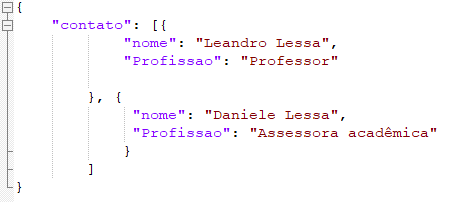

### Importando a biblioteca do JSON

In [40]:
import json 

### Realizando leitura do arquivo

In [41]:
with open('\\BASE_DESAFIO\\dados_contato.json', 'r') as file:
    arquivo = file.read()

In [42]:
json_dados = json.loads(arquivo)

### Verificando estrutura de chaves do arquivo JSON

In [44]:
json_dados.keys()

dict_keys(['contato'])

### Criando novo banco chamado pessoadb

In [47]:
db = conn.pessoadb
type(db)

pymongo.database.Database

### Criando nova coleção chamada dados_pessoais

In [51]:
collection = db.dados_pessoais

### Inserindo dados do arquivo JSON no banco MongoDB

In [52]:
for dado in json_dados['contato']:
    dado_id = collection.insert_one(dado)
    dado_id.inserted_id

### Verificando quantidade de registros dentro da coleção

In [53]:
db.dados_pessoais.estimated_document_count()

2

### Visualizando dados inseridos

In [48]:
for dados in db.dados_pessoais.find():
    pprint.pprint(dados)

{'Profissao': 'Professor',
 '_id': ObjectId('605827798a38a3aac0ac263a'),
 'nome': 'Leandro Lessa'}
{'Profissao': 'Assessora acadÃªmica',
 '_id': ObjectId('605827798a38a3aac0ac263b'),
 'nome': 'Daniele Lessa'}
